In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import csv

In [95]:
from bs4 import BeautifulSoup
import requests
from urllib.request import urlopen
import re
import pprint

In [96]:
url = "https://www.skysports.com/premier-league-table/2023"

In [97]:
resource = requests.get(url)

In [98]:
soup = BeautifulSoup(resource.text, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [99]:
title = soup.title.text
print(title)

Premier League Table & Standings - Sky Sports Football


In [100]:
print(resource.status_code)

200


In [101]:
league_table = soup.find('table', class_ = "standing-table__table")

In [102]:
position = []
teams = []
games_played = []
win = []
draw = []
lose = []
goal_for = []
goal_against = []
goal_diff = []
points = []

In [103]:
final_table = []
for team in league_table.find_all('tbody'):
        rows = team.find_all('tr')
        for row in rows:
            position.append(row.find_all('td', class_="standing-table__cell")[0].text)
            teams.append(row.find('td', class_="standing-table__cell standing-table__cell--name").text.strip())
            games_played.append(row.find_all('td', class_ = "standing-table__cell")[2].text)
            win.append(row.find_all('td', class_ = "standing-table__cell")[3].text)
            draw.append(row.find_all('td', class_ = "standing-table__cell")[4].text)
            lose.append(row.find_all('td', class_ = "standing-table__cell")[5].text)
            goal_for.append(row.find_all('td', class_ = "standing-table__cell")[6].text)
            goal_against.append(row.find_all('td', class_ = "standing-table__cell")[7].text)
            goal_diff.append(row.find_all('td', class_ = "standing-table__cell")[8].text)
            points.append(row.find_all('td', class_ = "standing-table__cell")[9].text)

In [104]:
epltable_23 = pd.DataFrame({'Position':position, 'Teams':teams, 'Games Played':games_played, 'Win':win, 'Draw':draw, 'Lose':lose,
                           'Goal For':goal_for, 'Goal Against':goal_against, 'Goal Diff':goal_diff, 'Points':points})

In [105]:
#THE PERMIER LEAGUE TABLE
epltable_23

,Position,Teams,Games Played,Win,Draw,Lose,Goal For,Goal Against,Goal Diff,Points
0,1,Manchester City,38,28,7,3,96,34,62,91
1,2,Arsenal,38,28,5,5,91,29,62,89
2,3,Liverpool,38,24,10,4,86,41,45,82
3,4,Aston Villa,38,20,8,10,76,61,15,68
4,5,Tottenham Hotspur,38,20,6,12,74,61,13,66
5,6,Chelsea,38,18,9,11,77,63,14,63
6,7,Newcastle United,38,18,6,14,85,62,23,60
7,8,Manchester United,38,18,6,14,57,58,-1,60
8,9,West Ham United,38,14,10,14,60,74,-14,52
9,10,Crystal Palace,38,13,10,15,57,58,-1,49


In [111]:
url = "https://en.wikipedia.org/wiki/2023%E2%80%9324_Premier_League"
page = requests.get(url)

In [112]:
soup = BeautifulSoup(page.text, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [113]:
print(page.status_code)

200


In [114]:
title = soup.title.text
print(title)

2023–24 Premier League - Wikipedia


In [125]:
score_chart = soup.find_all('table', class_="wikitable")[4]
score_chart = pd.read_html(str(score_chart))
score_chart = pd.DataFrame(score_chart[0])


In [126]:
score_chart.to_csv('score_chart.csv', index = False, header = True)

In [127]:
#ALL THE SCORES FROM THE GAMES PLAYED

score_chart = pd.read_csv('goal_chart.csv')
score_chart

,Home \ Away,ARS,AVL,BOU,BHA,BUR,CHE,CRY,EVE,LEI,...,MCI,MUN,NEW,NOR,SHU,SOU,TOT,WAT,WHU,WOL
0,Arsenal,—,3–2,1–0,1–2,2–1,1–2,2–2,3–2,1–1,...,0–3,2–0,4–0,4–0,1–1,2–2,2–2,3–2,1–0,1–1
1,Aston Villa,1–0,—,1–2,2–1,2–2,1–2,2–0,2–0,1–4,...,1–6,0–3,2–0,1–0,0–0,1–3,2–3,2–1,0–0,0–1
2,Bournemouth,1–1,2–1,—,3–1,0–1,2–2,0–2,3–1,4–1,...,1–3,1–0,1–4,0–0,1–1,0–2,0–0,0–3,2–2,1–2
3,Brighton & Hove Albion,2–1,1–1,2–0,—,1–1,1–1,0–1,3–2,0–2,...,0–5,0–3,0–0,2–0,0–1,0–2,3–0,1–1,1–1,2–2
4,Burnley,0–0,1–2,3–0,1–2,—,2–4,0–2,1–0,2–1,...,1–4,0–2,1–0,2–0,1–1,3–0,1–1,1–0,3–0,1–1
5,Chelsea,2–2,2–1,0–1,2–0,3–0,—,2–0,4–0,1–1,...,2–1,0–2,1–0,1–0,2–2,0–2,2–1,3–0,0–1,2–0
6,Crystal Palace,1–1,1–0,1–0,1–1,0–1,2–3,—,0–0,0–2,...,0–2,0–2,1–0,2–0,0–1,0–2,1–1,1–0,2–1,1–1
7,Everton,0–0,1–1,1–3,1–0,1–0,3–1,3–1,—,2–1,...,1–3,1–1,2–2,0–2,0–2,1–1,1–1,1–0,2–0,3–2
8,Leicester City,2–0,4–0,3–1,0–0,2–1,2–2,3–0,2–1,—,...,0–1,0–2,5–0,1–1,2–0,1–2,2–1,2–0,4–1,0–0
9,Liverpool,3–1,2–0,2–1,2–1,1–1,5–3,4–0,5–2,2–1,...,3–1,2–0,3–1,4–1,2–0,4–0,2–1,2–0,3–2,1–0


In [138]:
bestscorer = soup.find_all('table', class_="wikitable")[5]
sc_df = pd.read_html(str(bestscorer))
sc_df = pd.DataFrame(sc_df[0])
print(sc_df)

    Rank                Player               Club  Goals[139]
0      1        Erling Haaland    Manchester City          27
1      2           Cole Palmer            Chelsea          22
2      3        Alexander Isak   Newcastle United          21
3      4            Phil Foden    Manchester City          19
4      4       Dominic Solanke        Bournemouth          19
5      4         Ollie Watkins        Aston Villa          19
6      7         Mohamed Salah          Liverpool          18
7      8         Son Heung-min  Tottenham Hotspur          17
8      9          Jarrod Bowen    West Ham United          16
9      9  Jean-Philippe Mateta     Crystal Palace          16
10     9           Bukayo Saka            Arsenal          16


In [139]:
#BEST GOALKEEPER

bestgk = soup.find_all('table', class_="wikitable")[7]
gk_df = pd.read_html(str(bestgk))
gk_df = pd.DataFrame(gk_df[0])
print(gk_df)

   Rank             Player               Club  Clean sheets[157]
0     1         David Raya            Arsenal                 16
1     2    Jordan Pickford            Everton                 13
2     3         Bernd Leno             Fulham                 10
3     3            Ederson    Manchester City                 10
4     5        André Onana  Manchester United                  9
5     6            Alisson          Liverpool                  8
6     6  Emiliano Martínez        Aston Villa                  8
7     8       Mark Flekken          Brentford                  7
8     8               Neto        Bournemouth                  7
9     8  Guglielmo Vicario  Tottenham Hotspur                  7


In [180]:
#WINNERS OF MONTHLY MANAGER OF THE MONTH AND PLAYER OF THE MONTH

awards = soup.find_all('table', class_="wikitable")[8]
aw_df = pd.read_html(str(assists))
aw_df = pd.DataFrame(aw_df[0])
print(aw_df)

       Month Manager of the Month                    Player of the Month  \
       Month              Manager               Club              Player   
0     August     Ange Postecoglou  Tottenham Hotspur      James Maddison   
1  September     Ange Postecoglou  Tottenham Hotspur       Son Heung-min   
2    October     Ange Postecoglou  Tottenham Hotspur       Mohamed Salah   
3   November         Erik ten Hag  Manchester United       Harry Maguire   
4   December           Unai Emery        Aston Villa     Dominic Solanke   
5    January         Jürgen Klopp          Liverpool          Diogo Jota   
6   February         Mikel Arteta            Arsenal      Rasmus Højlund   
7      March        Andoni Iraola        Bournemouth       Rodrigo Muniz   
8      April           Sean Dyche            Everton         Cole Palmer   

                        Goal of the Month                          \
                Club               Player                    Club   
0  Tottenham Hotspur     

In [183]:
#END OF SEASON AWARDS
eos_aw = soup.find_all('table', class_="wikitable")[9]
eos_df = pd.read_html(str(assists))
eos_df = pd.DataFrame(eos_df[0])
print(eos_df)

                                            Award       Winner  \
0        Premier League Player of the Season[198]   Phil Foden   
1  Premier League Young Player of the Season[199]  Cole Palmer   
2                 FWA Footballer of the Year[200]   Phil Foden   

              Club  
0  Manchester City  
1          Chelsea  
2  Manchester City  


# VISUALISATIONS

In [155]:
import pylab as pl

In [171]:
league_table1 = epltable_23[['Teams', 'Win']].sort_values(by = 'Win', ascending = True)

In [172]:
league_table1

,Teams,Win
15,Brentford,10
10,Brighton and Hove Albion,12
9,Crystal Palace,13
14,Everton *,13
11,Bournemouth,13
12,Fulham,13
13,Wolverhampton Wanderers,13
8,West Ham United,14
5,Chelsea,18
6,Newcastle United,18


In [175]:
ind6 = sc_df.set_index('Player', inplace = True)

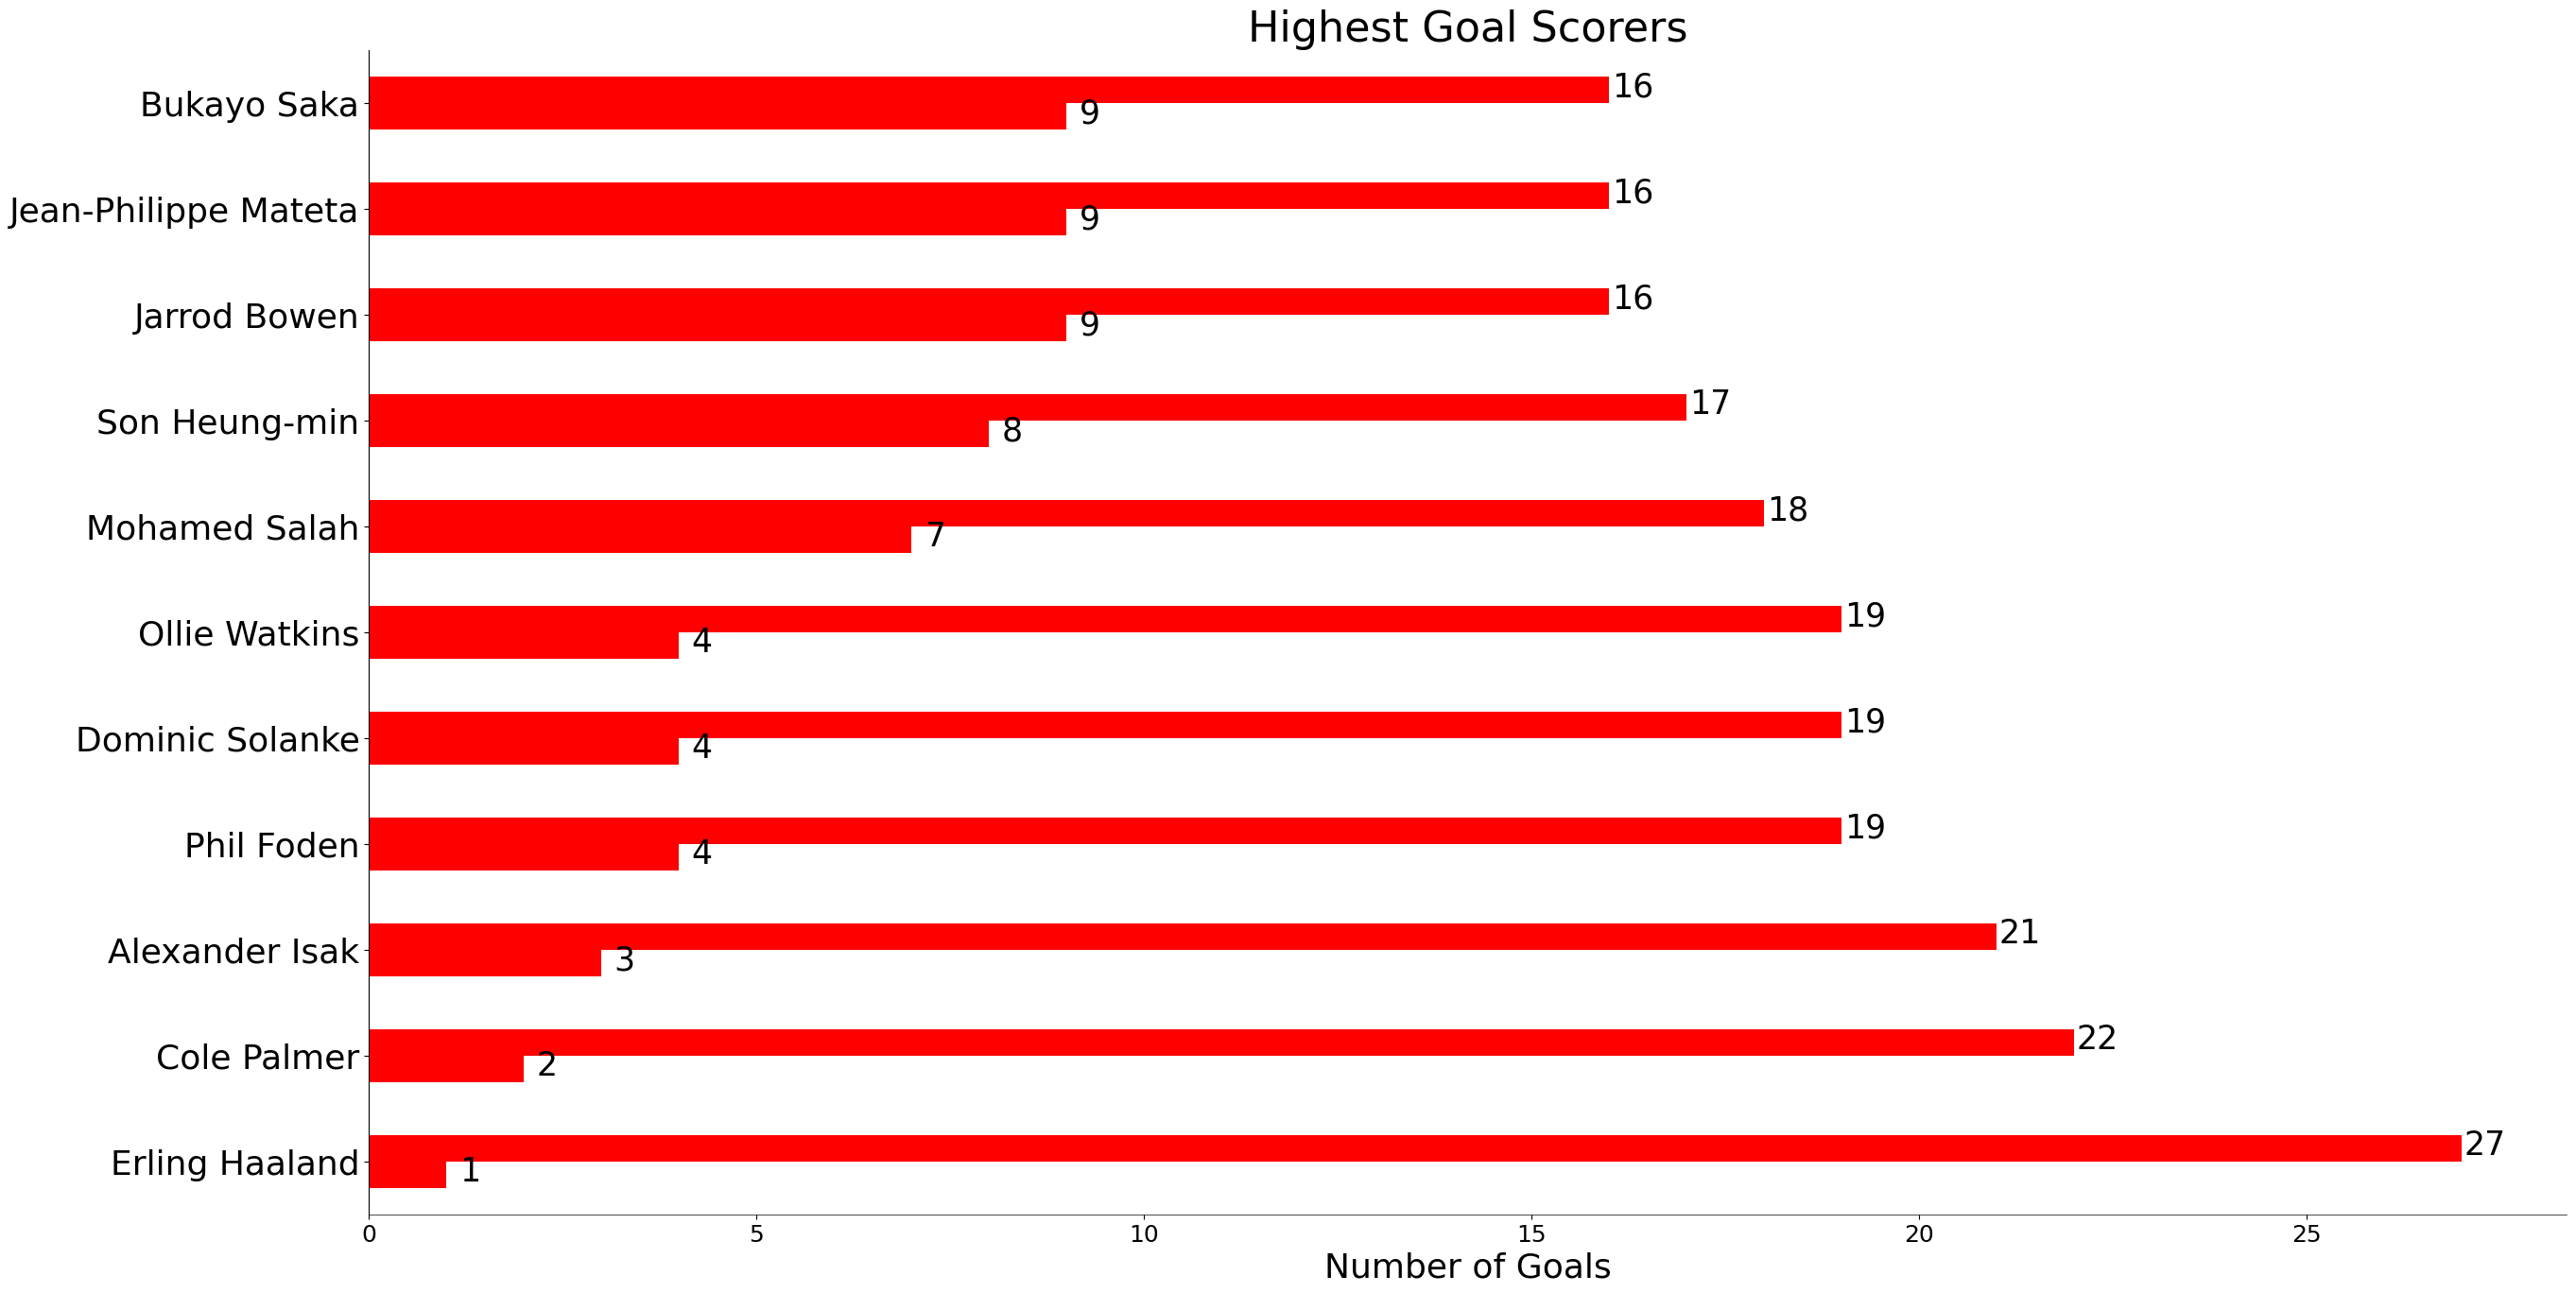

In [176]:
bar = sc_df.plot(kind = 'barh', figsize = (30, 16), color = 'red', legend = None)
bar
plt.yticks(ind6, fontsize = 26)
plt.xticks(ind6, fontsize = 18)
plt.ylabel('')
plt.xlabel('Number of Goals', fontsize = 26)
plt.title('Highest Goal Scorers', fontsize = 32)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
for i in bar.patches:
    bar.text(i.get_width()+.3, i.get_y()+.15, \
            str(round((i.get_width()), 2)), fontsize=25, color = 'black', ha = 'center', va = 'center')
plt.show()

In [185]:
clean_sheet1 = gk_df[['Player', 'Clean sheets[157]']].sort_values(by = 'Clean sheets[157]', ascending = True)

In [186]:
ind8= clean_sheet1.set_index('Player', inplace = True)

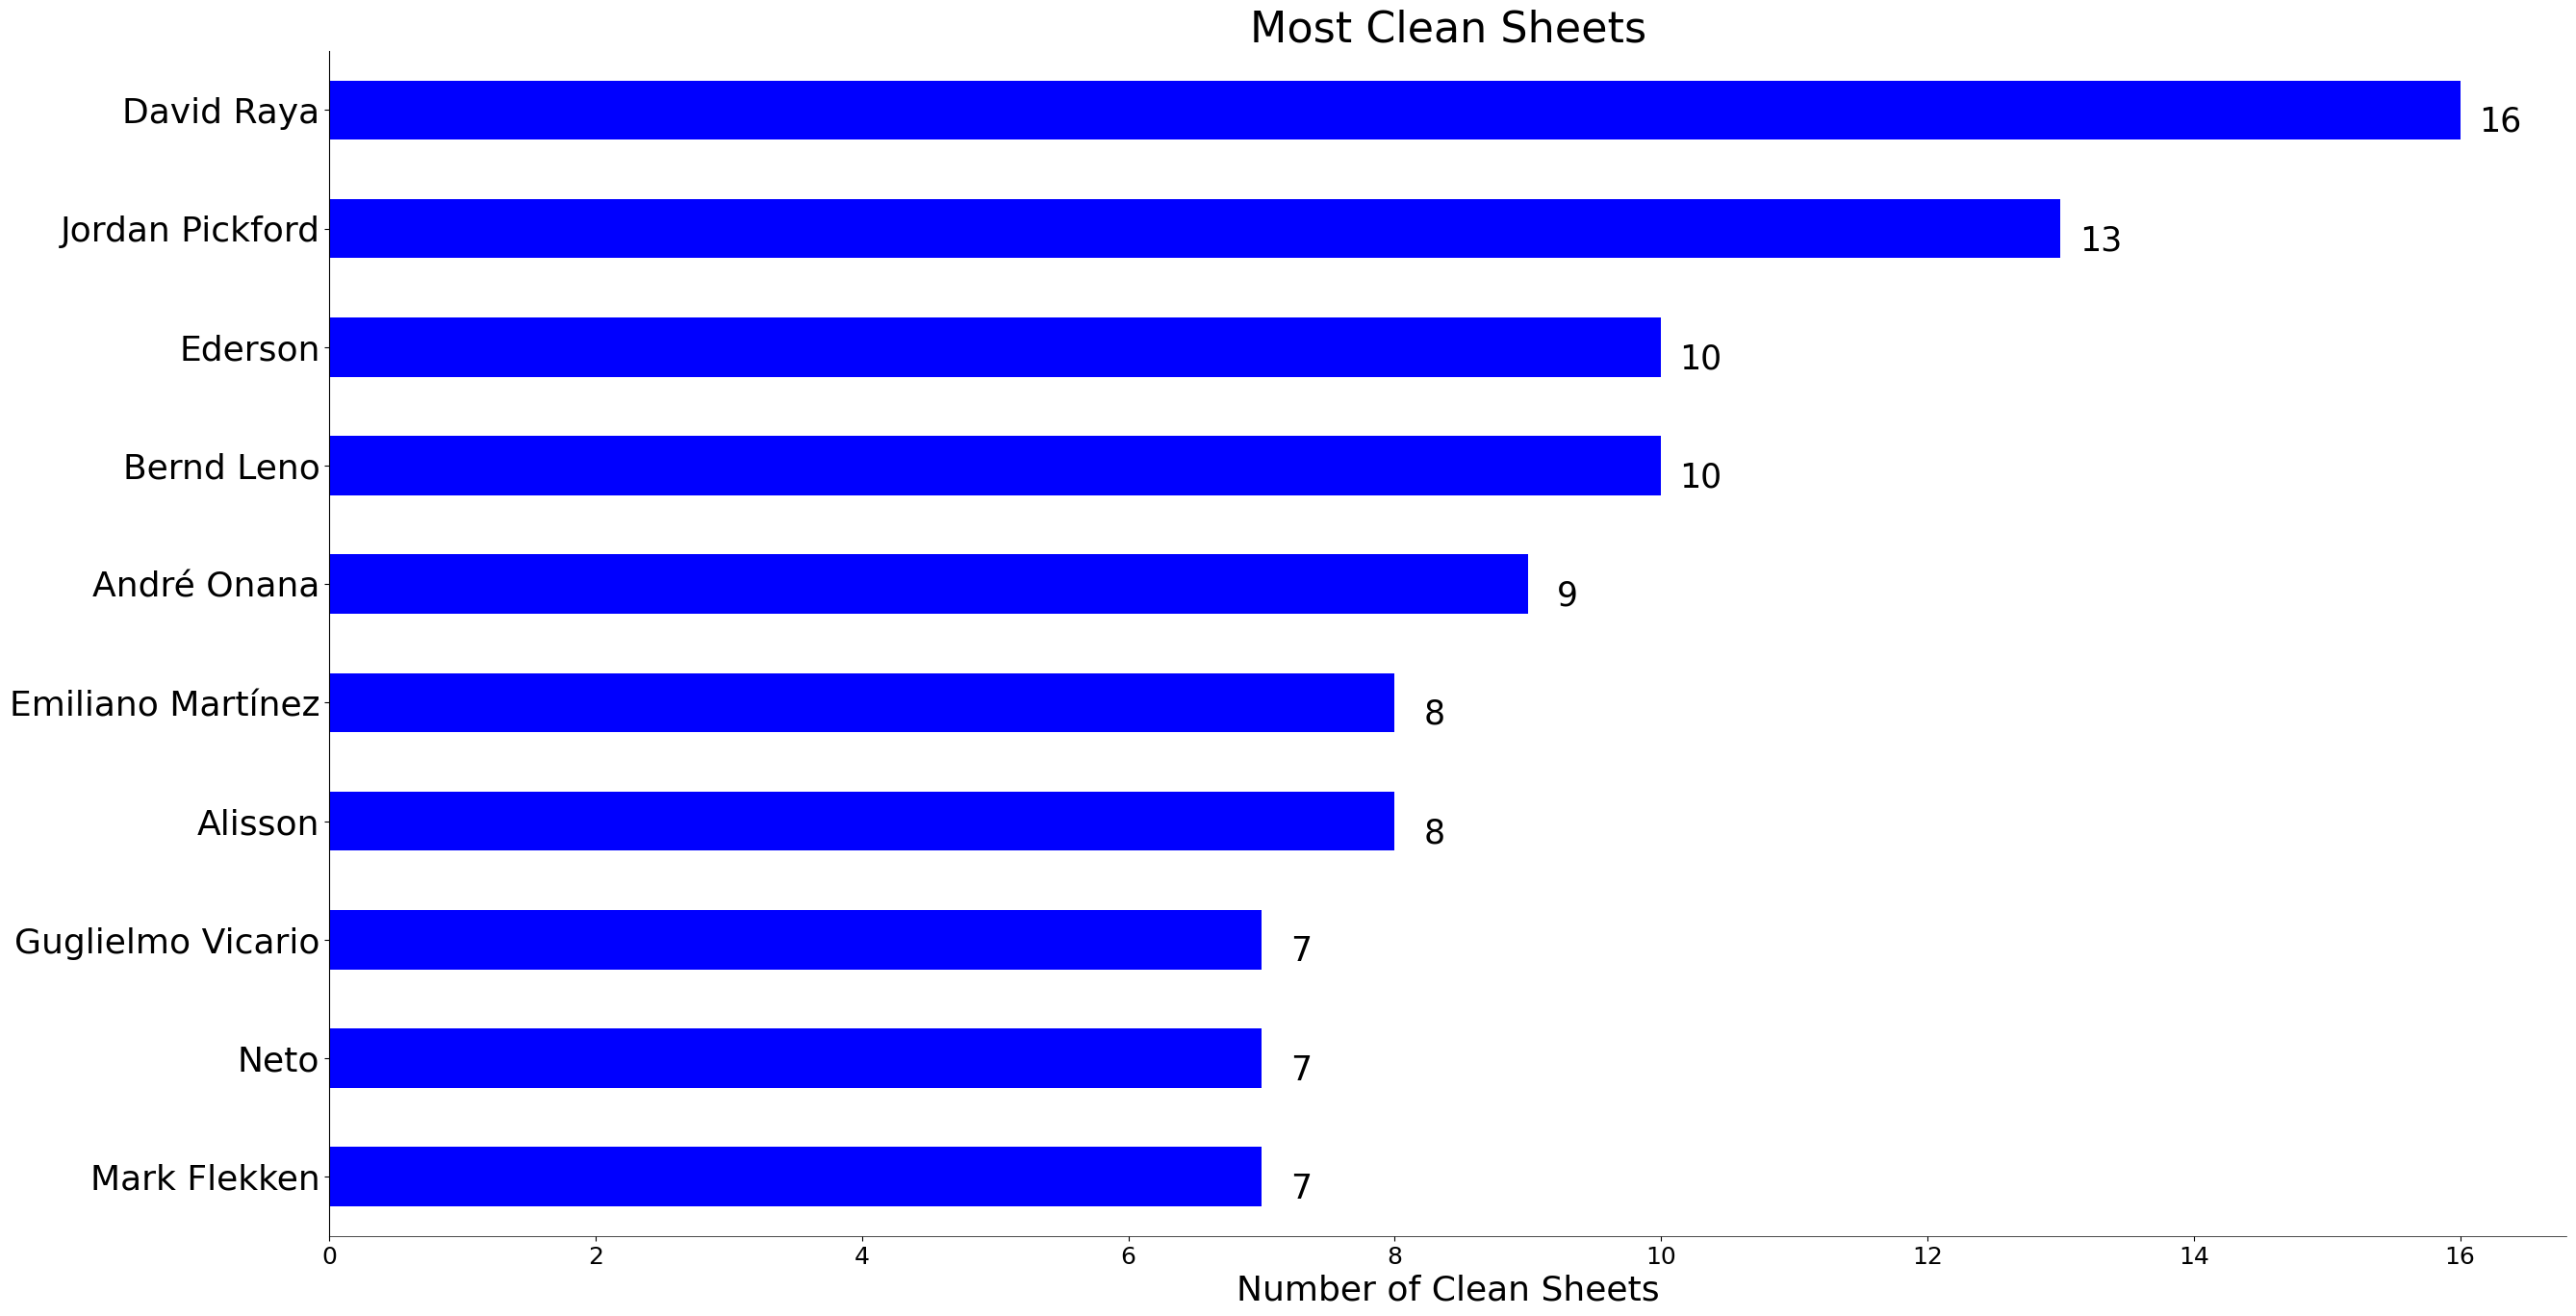

In [187]:
bar = clean_sheet1.plot(kind = 'barh', figsize = (30, 16), color = 'blue', legend = None)
bar
plt.yticks(ind8, fontsize = 26)
plt.xticks(ind8, fontsize = 18)
plt.ylabel('')
plt.xlabel('Number of Clean Sheets', fontsize = 26)
plt.title('Most Clean Sheets', fontsize = 32)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
for i in bar.patches:
    bar.text(i.get_width()+.3, i.get_y()+.15, \
            str(round((i.get_width()), 2)), fontsize=25, color = 'black', ha = 'center', va = 'center')
plt.show()